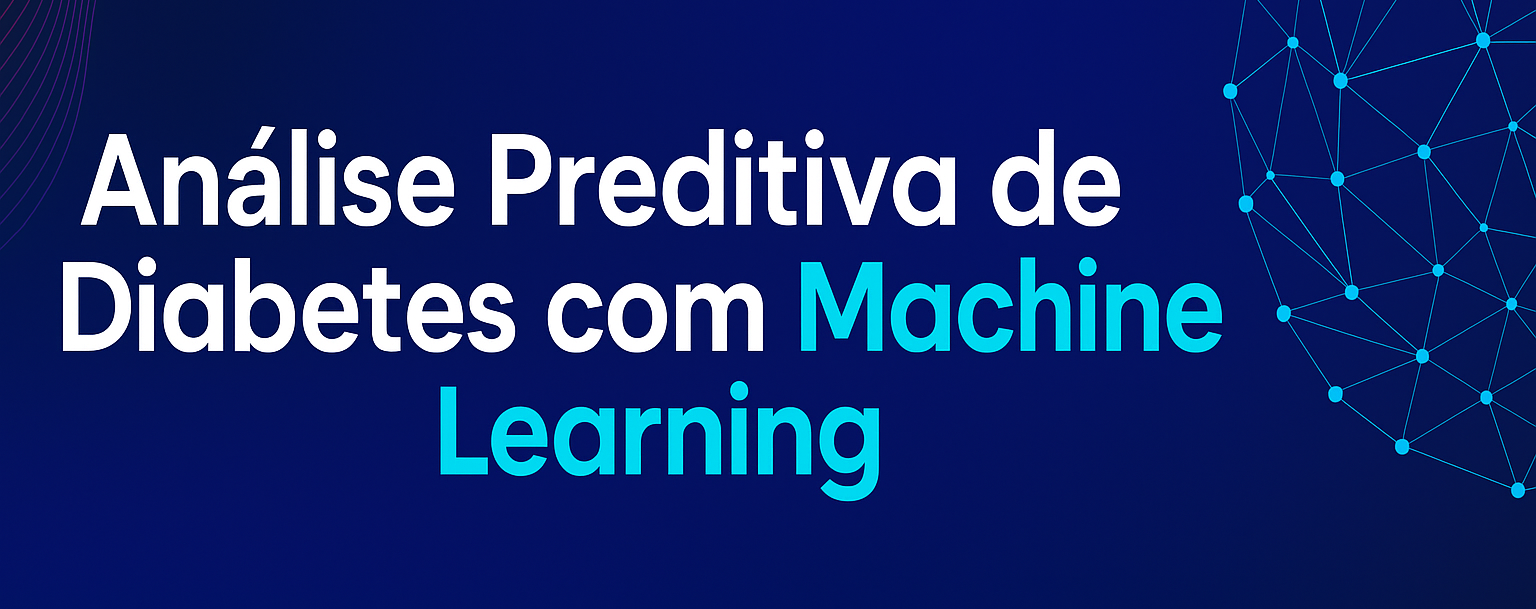

# **Análise Preditiva de Diabetes com Machine Learning - 1º Modelo**

---



###### Este projeto tem como objetivo prever a ocorrência de diabetes em pacientes, com base em atributos clínicos presentes do dataset [Diabetes](https://www.kaggle.com/datasets/rajakali/diabetesknn?resource=download), acessível no Kaggle. O modelo desenvolvido pode auxiliar profissionais da saúde na triagem e monitoramento de pacientes com maior risco de desenvolver a doença.

## **Características da Base de Dados**




O arquivo CSV, com 767 linhas e codificação de caracteres UTF-8, contém os seguintes dados, separados por vírgula:

- **Pregnancies**: Número de vezes que a paciente esteve grávida.

- **Glucose**: Concentração de glicose no plasma após jejum (mg/dL).

- **BloodPressure**: Pressão arterial diastólica (mm Hg).

- **SkinThickness**: Espessura da dobra cutânea do tríceps (mm).

- **Insulin**: Nível de insulina sérica 2 horas após ingestão de glicose (mu U/ml).

- **BMI**: Índice de Massa Corporal (peso em kg dividido pelo quadrado da altura em metros).

- **DiabetesPedigreeFunction**: Função de pedigree para diabetes (relaciona a probabilidade de hereditariedade).

- **Age**: Idade da paciente (em anos).

- **Outcome**: Diagnóstico de diabetes (0 = negativo, 1 = positivo).

## **Extração e Transformação dos Dados**


- Importação das bibliotecas
- Tradução das colunas da Base de Dados para facilitar a compreensão
- Criação da variável FaixaEtaria (Incluída com o propósito de testar a aplicação do codificador OneHotEncoder)





In [37]:
# Importando bibliotecas
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Extraindo os dados
df = pd.read_csv('diabetes.csv')
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [39]:
# Dicionário com a tradução das colunas
colunas_traduzidas = {
    "Pregnancies": "Gestações",
    "Glucose": "Glicose",
    "BloodPressure": "PressaoArterial",
    "SkinThickness": "EspessuraPele",
    "Insulin": "Insulina",
    "BMI": "IMC",
    "DiabetesPedigreeFunction": "HistoricoFamiliar",
    "Age": "Idade",
    "Outcome": "Resultado"
}

# Renomeando as colunas
df.rename(columns=colunas_traduzidas, inplace=True)

# Criando variável categórica - Faixa Etária
intervalos_idade = [0, 30, 45, 60, 120]
labels = ['Jovem', 'Adulto', 'Meia-idade', 'Idoso']
df['FaixaEtaria'] = pd.cut(df['Idade'], bins=intervalos_idade, labels=labels)

# Exibindo as primeiras linhas do dataframe traduzido
df.head(7)

,Gestações,Glicose,PressaoArterial,EspessuraPele,Insulina,IMC,HistoricoFamiliar,Idade,Resultado,FaixaEtaria
0,6,148,72,35,0,33.6,0.627,50,1,Meia-idade
1,1,85,66,29,0,26.6,0.351,31,0,Adulto
2,8,183,64,0,0,23.3,0.672,32,1,Adulto
3,1,89,66,23,94,28.1,0.167,21,0,Jovem
4,0,137,40,35,168,43.1,2.288,33,1,Adulto
5,5,116,74,0,0,25.6,0.201,30,0,Jovem
6,3,78,50,32,88,31.0,0.248,26,1,Jovem


## **Visualização e Análise Exploratória de Dados (EDA)**

- Estatísticas descritivas do Dataset
- Divisão de variáveis por tipo
- Distribuições e Correlações entre variáveis

In [40]:
# Informações básicas
print("\n" + "="*40)
print("INFORMAÇÕES DO DATAFRAME")
print("="*40)
print(df.info())

print("\n" + "="*40)
print("ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS")
print("="*40)
print(tabulate(df.describe().T, headers='keys', tablefmt='grid', floatfmt=".2f"))

print("\n" + "="*40)
print("ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS CATEGÓRICAS")
print("="*40)
print(tabulate(df.describe(include=['object', 'category']).T, headers='keys', tablefmt='grid'))



INFORMAÇÕES DO DATAFRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gestações          767 non-null    int64   
 1   Glicose            767 non-null    int64   
 2   PressaoArterial    767 non-null    int64   
 3   EspessuraPele      767 non-null    int64   
 4   Insulina           767 non-null    int64   
 5   IMC                767 non-null    float64 
 6   HistoricoFamiliar  767 non-null    float64 
 7   Idade              767 non-null    int64   
 8   Resultado          767 non-null    int64   
 9   FaixaEtaria        767 non-null    category
dtypes: category(1), float64(2), int64(7)
memory usage: 55.0 KB
None

ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS
+-------------------+---------+--------+--------+-------+-------+--------+--------+--------+
|                   |   count |   mean |    std |   min |   25% |    50

In [41]:
# Diferenciando variáveis por tipo
variaveis_numericas = [
    "Gestações", "Glicose", "PressaoArterial", "EspessuraPele",
    "Insulina", "IMC", "HistoricoFamiliar"
]
variaveis_categoricas = ["FaixaEtaria"]

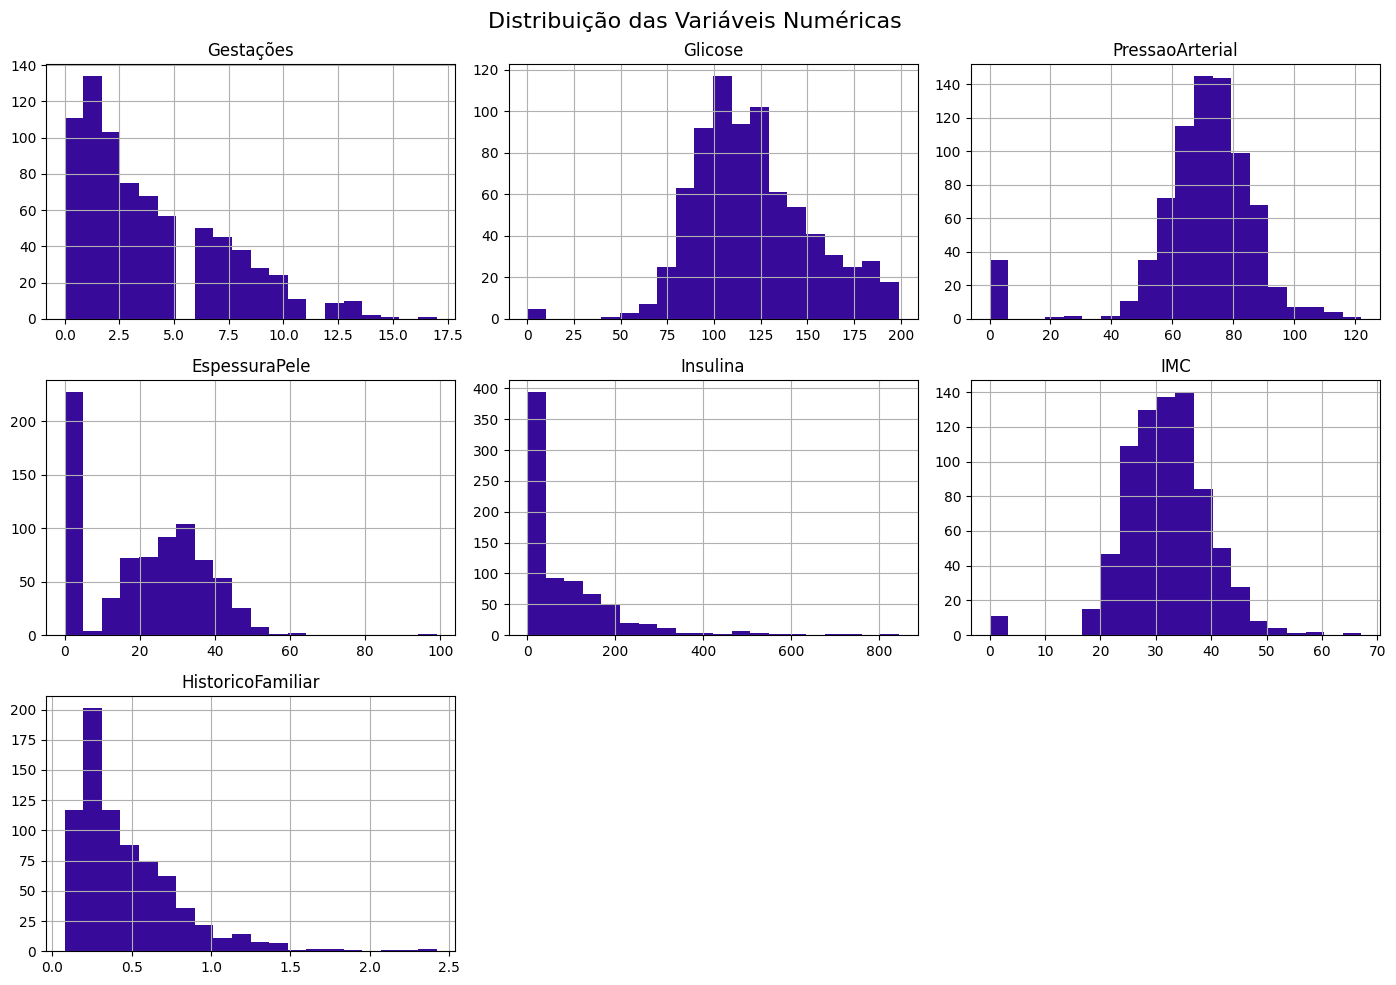

In [42]:
# Histograma
df[variaveis_numericas].hist(bins=20, figsize=(14, 10), color='#380A9A')
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


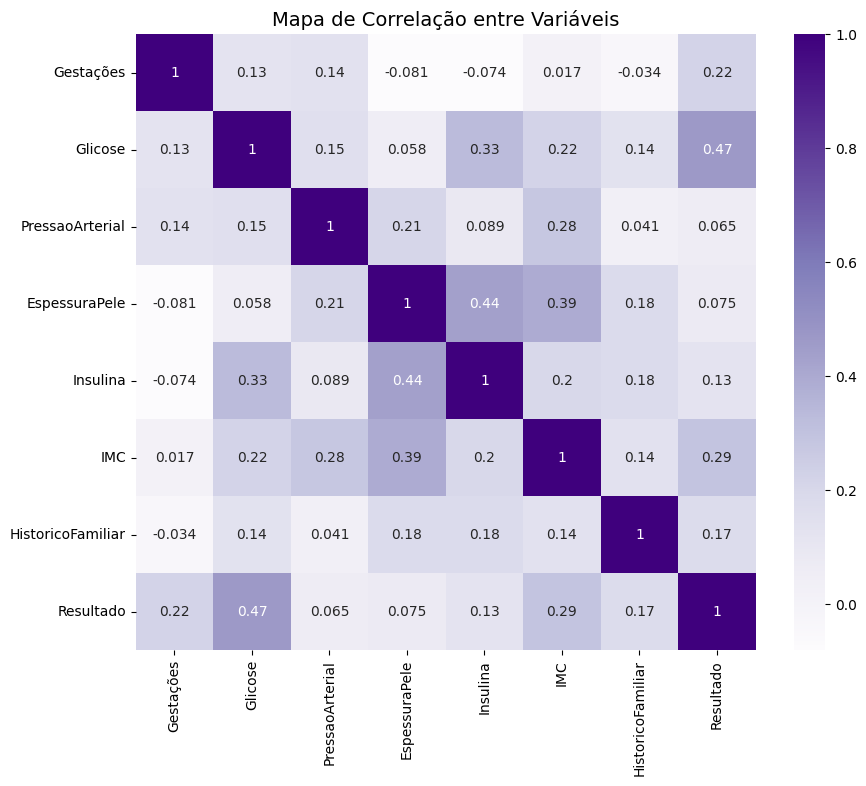

In [43]:
# Mapa de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df[variaveis_numericas + ["Resultado"]].corr(), annot=True, cmap='Purples')
plt.title("Mapa de Correlação entre Variáveis", fontsize=14)
plt.show()

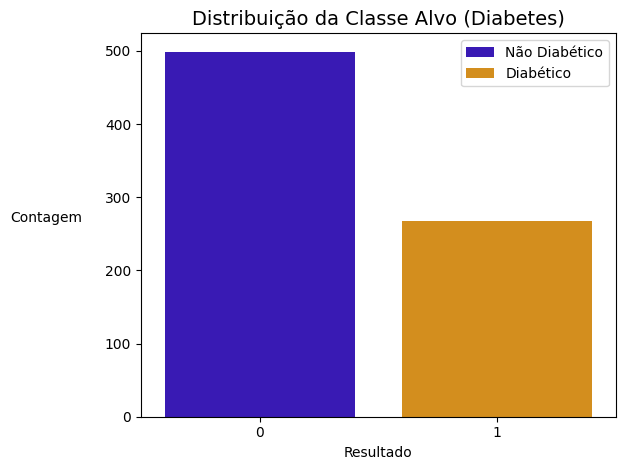

In [44]:
# Distribuição da variável alvo
cores = {0: '#2900CE', 1: '#F19500'}

sns.countplot(data=df, x="Resultado", hue="Resultado", dodge=False, palette=cores)
plt.title("Distribuição da Classe Alvo (Diabetes)", fontsize=14)
plt.xlabel("Resultado")
plt.ylabel("Contagem", rotation=0)
plt.gca().yaxis.set_label_coords(-0.20, 0.5)
plt.legend(labels=["Não Diabético", "Diabético"])
plt.tight_layout()
plt.show()

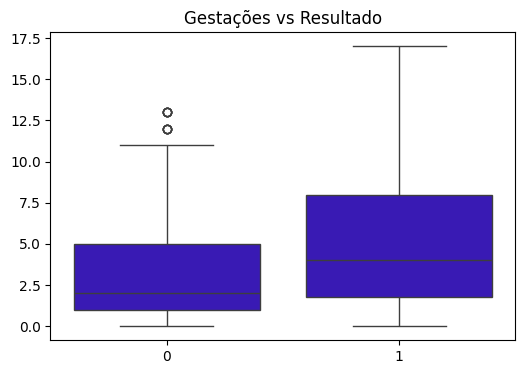

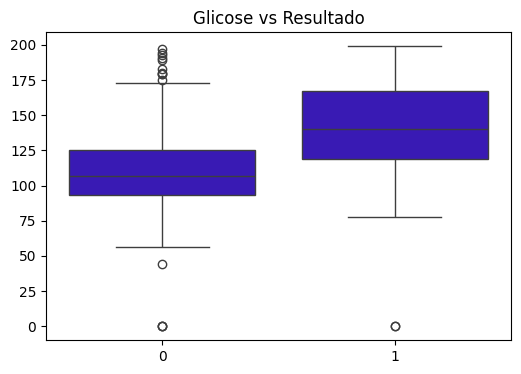

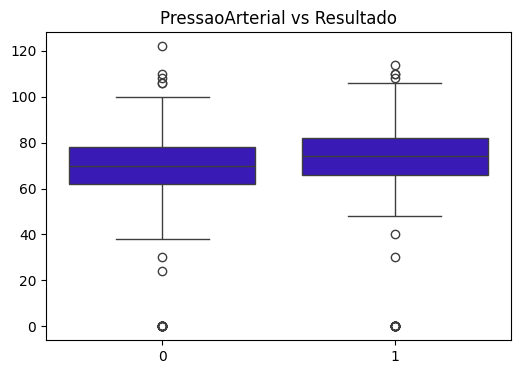

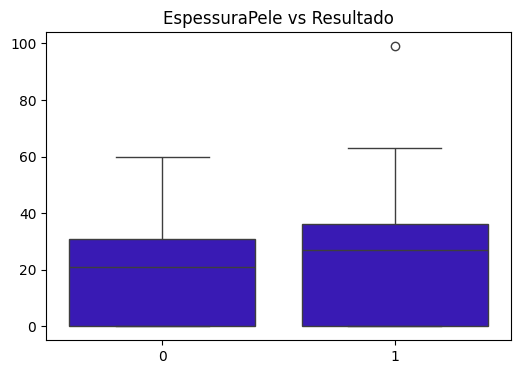

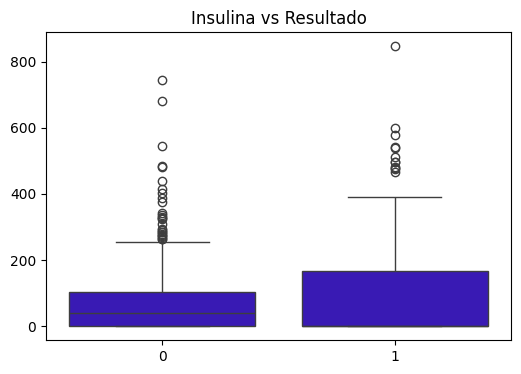

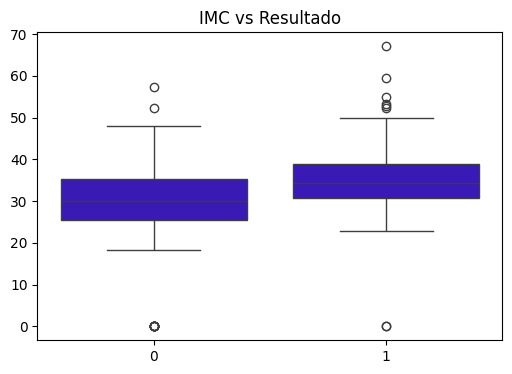

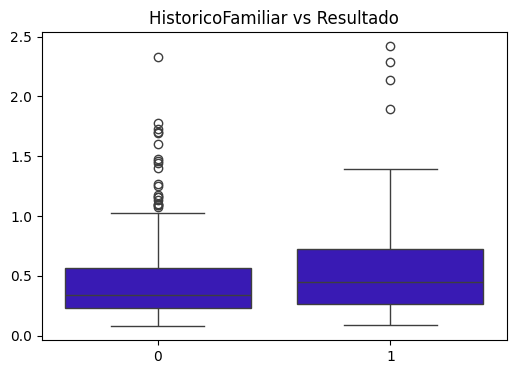

In [45]:
# Boxplots de variáveis numéricas por classe
for var in variaveis_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Resultado", y=var, data=df, color="#2900CE")
    plt.title(f"{var} vs Resultado", fontsize=12)
    plt.ylabel("")
    plt.xlabel("")
    plt.show()


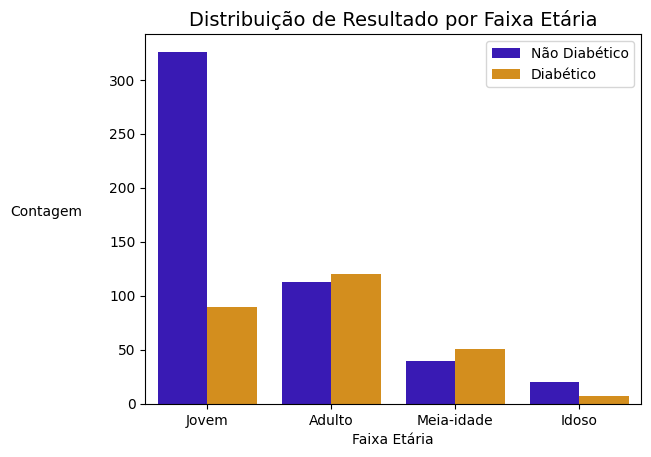

In [46]:
# Faixa Etária vs Resultado
cores = {0: '#2900CE', 1: '#F19500'}

sns.countplot(x="FaixaEtaria", hue="Resultado", data=df, palette=cores)
plt.title("Distribuição de Resultado por Faixa Etária", fontsize=14)
plt.xlabel("Faixa Etária")
plt.ylabel("Contagem", rotation=0)
plt.gca().yaxis.set_label_coords(-0.20, 0.5)
plt.legend(labels=["Não Diabético", "Diabético"])
plt.show()

##**Pré-processamento e Pipeline de Dados**

- Separação de Features (X) e Target (y)
- Padronização e Pré-processamento com ColumnTransformer
- Criação do Pipeline
- Divisão em Conjuntos de Treino e Teste

In [47]:
# Removendo a coluna 'Idade'
df.drop(columns="Idade", inplace=True)

# Separando Features e Target
X = df.drop("Resultado", axis=1)
y = df["Resultado"]

# Pré-processamento com ColumnTransformer
preprocessador = ColumnTransformer(transformers=[
    ("numericas", StandardScaler(), variaveis_numericas),
    ("categoricas", OneHotEncoder(drop="first"), variaveis_categoricas)
])

# Criando Pipeline com KNN
pipeline = Pipeline(steps=[
    ("preprocessamento", preprocessador),
    ("modelo", KNeighborsClassifier(n_neighbors=5))
])

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
pipeline.fit(X_train, y_train)

# Predição e avaliação
y_pred = pipeline.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório:\n", classification_report(y_test, y_pred))



Acurácia: 0.7467532467532467
Relatório:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       103
           1       0.64      0.53      0.58        51

    accuracy                           0.75       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



##**Avaliação do Modelo**



- Matriz de Confusão para avaliar a qualidade da classificação feita pelo modelo
- **78% de chance** do modelo classificar corretamente uma observação positiva como tendo maior probabilidade do que uma negativa.
- **88 (Verdadeiros Negativos - TN):** Pacientes que não têm diabetes e foram corretamente classificados como "Não Diabético".
- **15 (Falsos Positivos - FP):** Pacientes que não têm diabetes, mas foram incorretamente classificados como "Diabético".
- **24 (Falsos Negativos - FN):** Pacientes com diabetes que foram erroneamente classificados como "Não Diabético". Esse tipo de erro pode ser mais preocupante em termos clínicos.
- **27 (Verdadeiros Positivos - TP):** Pacientes com diabetes corretamente classificados como "Diabético".



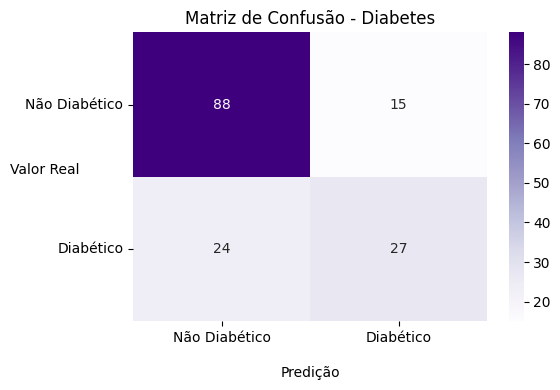

In [48]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Não Diabético', 'Diabético'],
            yticklabels=['Não Diabético', 'Diabético'])
plt.xlabel('Predição', labelpad=15)  # Aumenta a distância do título do eixo X
plt.ylabel('Valor Real', rotation=0)
plt.gca().yaxis.set_label_coords(-0.25, 0.5)
plt.yticks(rotation=0)
plt.title('Matriz de Confusão - Diabetes')
plt.tight_layout()
plt.show()


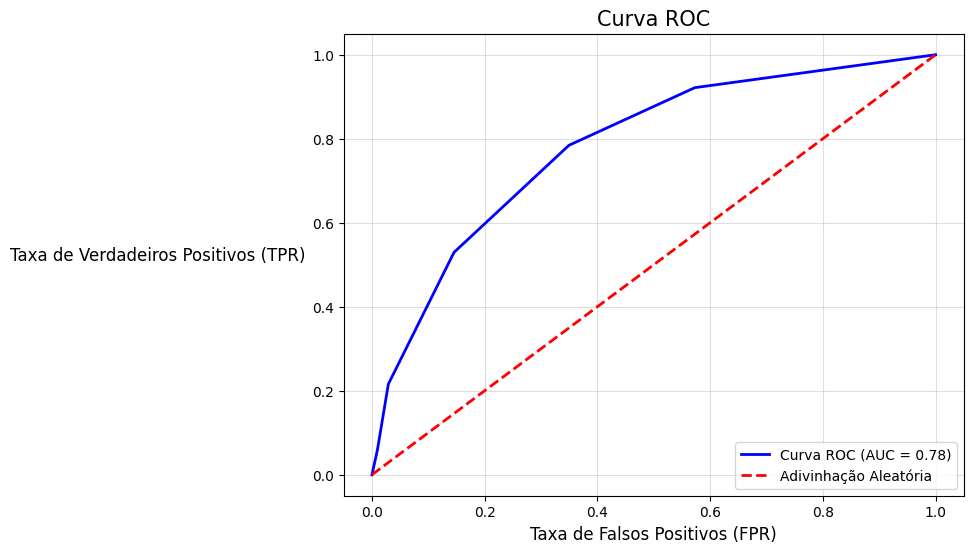

In [49]:
# Obtenção das probabilidades de predição
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Cálculo dos pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotagem da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Adivinhação Aleatória')
plt.xlabel("Taxa de Falsos Positivos (FPR)", fontsize=12)
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)", fontsize=12, rotation=0)
plt.gca().yaxis.set_label_coords(-0.30, 0.5)
plt.title("Curva ROC", fontsize=15)
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

## **Predição de Novos Pacientes**



- Dos **5 pacientes simulados**, **3 foram classificados como diabéticos** e **2 como não diabéticos**.


In [50]:
# Novos pacientes
novos_pacientes = pd.DataFrame([
    {"Gestações": 2, "Glicose": 120, "PressaoArterial": 70, "EspessuraPele": 25,
     "Insulina": 80, "IMC": 28.0, "HistoricoFamiliar": 0.5, "Idade": 25},

    {"Gestações": 4, "Glicose": 160, "PressaoArterial": 90, "EspessuraPele": 30,
     "Insulina": 130, "IMC": 35.0, "HistoricoFamiliar": 0.8, "Idade": 50},

    {"Gestações": 0, "Glicose": 90, "PressaoArterial": 60, "EspessuraPele": 20,
     "Insulina": 70, "IMC": 22.5, "HistoricoFamiliar": 0.3, "Idade": 35},

    {"Gestações": 5, "Glicose": 180, "PressaoArterial": 85, "EspessuraPele": 32,
     "Insulina": 200, "IMC": 40.0, "HistoricoFamiliar": 1.2, "Idade": 65},

    {"Gestações": 0, "Glicose": 150, "PressaoArterial": 90, "EspessuraPele": 30,
     "Insulina": 130, "IMC": 35.0, "HistoricoFamiliar": 0.2, "Idade": 36}
])

# Criando coluna FaixaEtaria
intervalos_idade = [0, 30, 45, 60, 120]
labels = ['Jovem', 'Adulto', 'Meia-idade', 'Idoso']
novos_pacientes['FaixaEtaria'] = pd.cut(novos_pacientes['Idade'], bins=intervalos_idade, labels=labels)

# Removendo a coluna 'Idade'
novos_pacientes.drop(columns="Idade", inplace=True)

# Fazendo predição
resultados = pipeline.predict(novos_pacientes)

# Mostrando resultados
novos_pacientes["Resultado_Previsto"] = resultados
novos_pacientes["Resultado_Previsto"] = novos_pacientes["Resultado_Previsto"].map({0: "Não Diabético", 1: "Diabético"})

print("\n=== PREDIÇÕES PARA NOVOS PACIENTES ===")
print(novos_pacientes)



=== PREDIÇÕES PARA NOVOS PACIENTES ===
   Gestações  Glicose  PressaoArterial  EspessuraPele  Insulina   IMC  \
0          2      120               70             25        80  28.0   
1          4      160               90             30       130  35.0   
2          0       90               60             20        70  22.5   
3          5      180               85             32       200  40.0   
4          0      150               90             30       130  35.0   

   HistoricoFamiliar FaixaEtaria Resultado_Previsto  
0                0.5       Jovem      Não Diabético  
1                0.8  Meia-idade          Diabético  
2                0.3      Adulto      Não Diabético  
3                1.2       Idoso          Diabético  
4                0.2      Adulto          Diabético  


# **Análise Preditiva de Diabetes com Machine Learning - 2º Modelo**

---


Durante a construção do modelo, foi identificado um desbalanceamento entre as classes, com mais pacientes não diabéticos. Para corrigir isso, aplicou-se a técnica **SMOTE**, que gera amostras sintéticas da classe minoritária. O objetivo foi aumentar o **Recall e o F1-Score**, focando na identificação correta de pacientes diabéticos, mesmo com possível queda na acurácia.

In [51]:
# Carregando os dados
df = pd.read_csv("diabetes.csv")

# Separando features e target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treinando modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

# Fazendo predições
y_pred = knn.predict(X_test)

# Resultados
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Exibindo os resultados
print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(report)


Acurácia: 0.70
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       100
           1       0.56      0.70      0.62        54

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



##**Avaliação do Modelo**

- **76% de chance** do modelo classificar corretamente uma observação positiva como tendo maior probabilidade do que uma negativa.
- **70 (Verdadeiros Negativos - TN)**: Pacientes que não têm diabetes e foram corretamente classificados como "Não Diabético".
- **30 (Falsos Positivos - FP)**: Pacientes que não têm diabetes, mas foram incorretamente classificados como "Diabético".
- **16 (Falsos Negativos - FN)**: Pacientes com diabetes que foram erroneamente classificados como "Não Diabético". Esse tipo de erro pode ser mais preocupante em termos clínicos.
- **38 (Verdadeiros Positivos - TP)**: Pacientes com diabetes corretamente classificados como "Diabético".

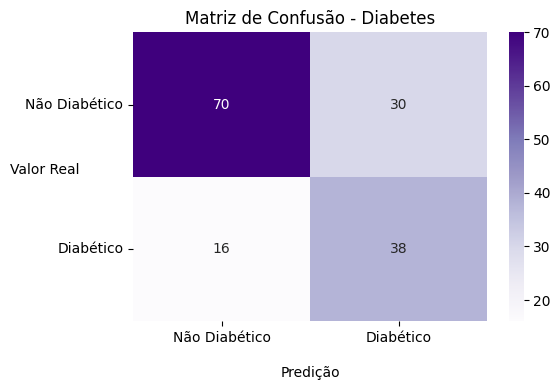

In [52]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Não Diabético', 'Diabético'],
            yticklabels=['Não Diabético', 'Diabético'])
plt.xlabel('Predição', labelpad=15)  # Aumenta a distância do título do eixo X
plt.ylabel('Valor Real', rotation=0)
plt.gca().yaxis.set_label_coords(-0.25, 0.5)
plt.yticks(rotation=0)
plt.title('Matriz de Confusão - Diabetes')
plt.tight_layout()
plt.show()


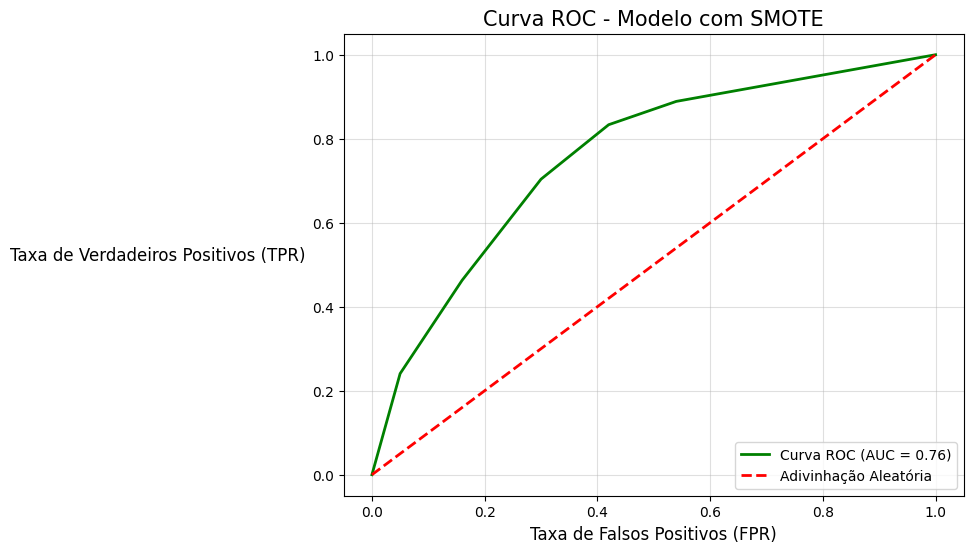

In [53]:
# Obtenção das probabilidades de predição
y_prob_smote = knn.predict_proba(X_test)[:, 1]

# Cálculo dos pontos da curva ROC
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_prob_smote)
roc_auc_smote = roc_auc_score(y_test, y_prob_smote)

# Plotagem da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, color='green', lw=2, label=f'Curva ROC (AUC = {roc_auc_smote:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Adivinhação Aleatória')
plt.xlabel("Taxa de Falsos Positivos (FPR)", fontsize=12)
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)", fontsize=12, rotation=0)
plt.gca().yaxis.set_label_coords(-0.30, 0.5)
plt.title("Curva ROC - Modelo com SMOTE", fontsize=15)
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()


## **Predição de Novos Pacientes**

- Dos **5 pacientes simulados**, **3 foram classificados como diabéticos** e **2 como não diabéticos**.

In [54]:
# Novos pacientes
novos_pacientes = pd.DataFrame([
    {"Gestações": 2, "Glicose": 120, "PressaoArterial": 70, "EspessuraPele": 25,
     "Insulina": 80, "IMC": 28.0, "HistoricoFamiliar": 0.5, "Idade": 25},

    {"Gestações": 4, "Glicose": 160, "PressaoArterial": 90, "EspessuraPele": 30,
     "Insulina": 130, "IMC": 35.0, "HistoricoFamiliar": 0.8, "Idade": 50},

    {"Gestações": 0, "Glicose": 90, "PressaoArterial": 60, "EspessuraPele": 20,
     "Insulina": 70, "IMC": 22.5, "HistoricoFamiliar": 0.3, "Idade": 35},

    {"Gestações": 5, "Glicose": 180, "PressaoArterial": 85, "EspessuraPele": 32,
     "Insulina": 200, "IMC": 40.0, "HistoricoFamiliar": 1.2, "Idade": 65},

     {"Gestações": 0, "Glicose": 150, "PressaoArterial": 90, "EspessuraPele": 30,
     "Insulina": 130, "IMC": 35.0, "HistoricoFamiliar": 0.2, "Idade": 36}
])

# Criando coluna FaixaEtaria
intervalos_idade = [0, 30, 45, 60, 120]
labels = ['Jovem', 'Adulto', 'Meia-idade', 'Idoso']
novos_pacientes['FaixaEtaria'] = pd.cut(novos_pacientes['Idade'], bins=intervalos_idade, labels=labels)

# Removendo a coluna 'Idade'
novos_pacientes.drop(columns="Idade", inplace=True)

# Fazendo predição
resultados = pipeline.predict(novos_pacientes)

# Mostrando resultados
novos_pacientes["Resultado_Previsto"] = resultados
novos_pacientes["Resultado_Previsto"] = novos_pacientes["Resultado_Previsto"].map({0: "Não Diabético", 1: "Diabético"})

print("\n=== PREDIÇÕES PARA NOVOS PACIENTES ===")
print(novos_pacientes)



=== PREDIÇÕES PARA NOVOS PACIENTES ===
   Gestações  Glicose  PressaoArterial  EspessuraPele  Insulina   IMC  \
0          2      120               70             25        80  28.0   
1          4      160               90             30       130  35.0   
2          0       90               60             20        70  22.5   
3          5      180               85             32       200  40.0   
4          0      150               90             30       130  35.0   

   HistoricoFamiliar FaixaEtaria Resultado_Previsto  
0                0.5       Jovem      Não Diabético  
1                0.8  Meia-idade          Diabético  
2                0.3      Adulto      Não Diabético  
3                1.2       Idoso          Diabético  
4                0.2      Adulto          Diabético  
